In [2]:
#import the required libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from unipressed import IdMappingClient
import time
from collections import Counter
import os
import csv


In [4]:
                                        #Prepare txt file

#This cell creates the csv file to be used in the entire project
data=[]

#Read text file to extract data
with open("./pathLinkerData/PathLinker_2018_human-ppi-weighted-cap0_75.txt",'r') as data_file:
    for line in data_file:
        #Divide the data by whitespace into 4 columns
        appended = line.split(maxsplit=3)

        #Data is a list of lists of strings, where each string represents a cell in the text file
        data.append(appended)

tail = []
head = []
edge_weight = []
edge_type=[]

#Append each column in a list
for i in data:
   #Clean column names for convenience
   tail.append(i[0].strip("#"))
   head.append(i[1])
   edge_weight.append(i[2])
   edge_type.append(i[3].strip())

#Zip the 4 columns into rows
rows = zip(tail, head, edge_weight, edge_type)

#Write the rows in a csv file
with open("./pathLinkerData/PathLinker_2018_human-ppi-weighted-cap0_75.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
full_df=pd.read_csv('./pathLinkerData/PathLinker_2018_human-ppi-weighted-cap0_75.csv')
df_2500=pd.read_csv('./pathLinkerData/PathLinker2500data.csv')
df_100=pd.read_csv('./pathLinkerData/PathLinker100data.csv')

In [52]:
                                            #ponit 1 Graph *from full data*
                                            #ٌREQUIRE HEAVY PROCESSING TIME
#Read the data from csv and identifying the weights
G=nx.from_pandas_edgelist(full_df,'tail','head',edge_attr='edge_weight')

#Compute the degree centrality degree
degCent=nx.degree_centrality(G)
#Sort the resulting protein list descendingly
degCent_sorted=dict(sorted(degCent.items(), key=lambda item: item[1],reverse=True))
#Store the top 100 proteins
keys_deg_top=list(degCent_sorted)[0:100]

#Convert each string to a list and write the result to a csv file
top_100_proteins=[]
for i in keys_deg_top:
    _list=[i]
    top_100_proteins.append(_list)

with open("./exportedfiles/Top100DegreeCentralityProteins.csv","w",newline="\n") as f:
    write = csv.writer(f)
    write.writerows(top_100_proteins)
    
#pos=nx.spring_layout(G)
#plt.figure(figsize=(20,20))
#nx.draw(G,pos,node_size=200,node_color = 'yellow')
#nx.draw_networkx_edge_labels(G,pos,font_size=10,edge_labels=nx.get_edge_attributes(G,'edge_weight'))
#plt.savefig('./Graphs/weightedGraph.jpg')
#plt.show()


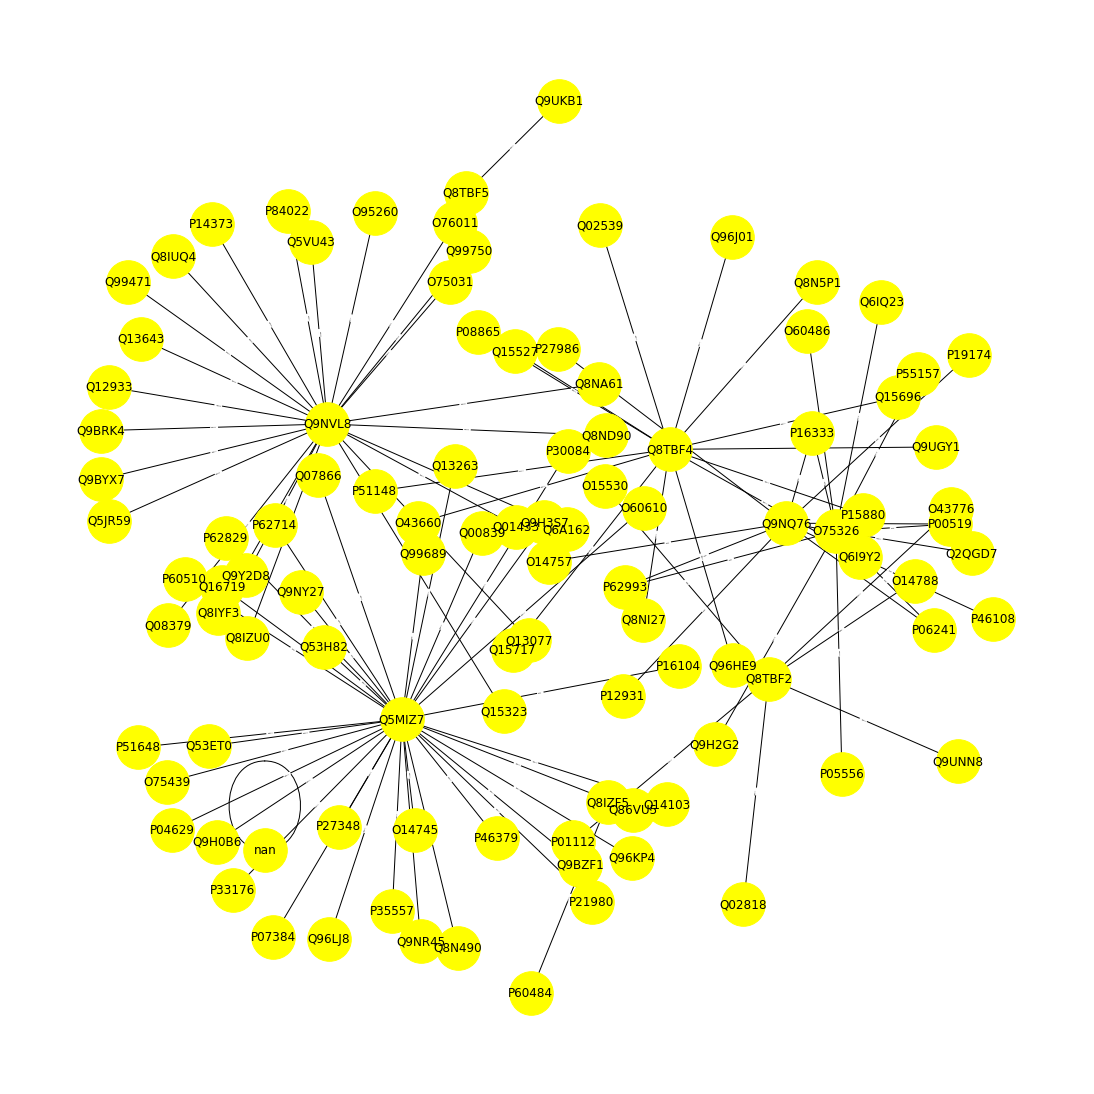

In [53]:
                                        #point 1 *from just 200 data*
#Read the data from csv and identifying the weights
G=nx.from_pandas_edgelist(df_100,'tail','head',edge_attr='edge_weight')
pos=nx.spring_layout(G,k=0.45)
plt.figure(figsize=(15,15))
nx.draw(G,pos,with_labels=True,node_size=1900,node_color = 'yellow')
nx.draw_networkx_edge_labels(G,pos,font_size=2,edge_labels=nx.get_edge_attributes(G,'edge_weight'))
plt.savefig('./Graphs/weightedGraphonly100.jpg')
plt.show()

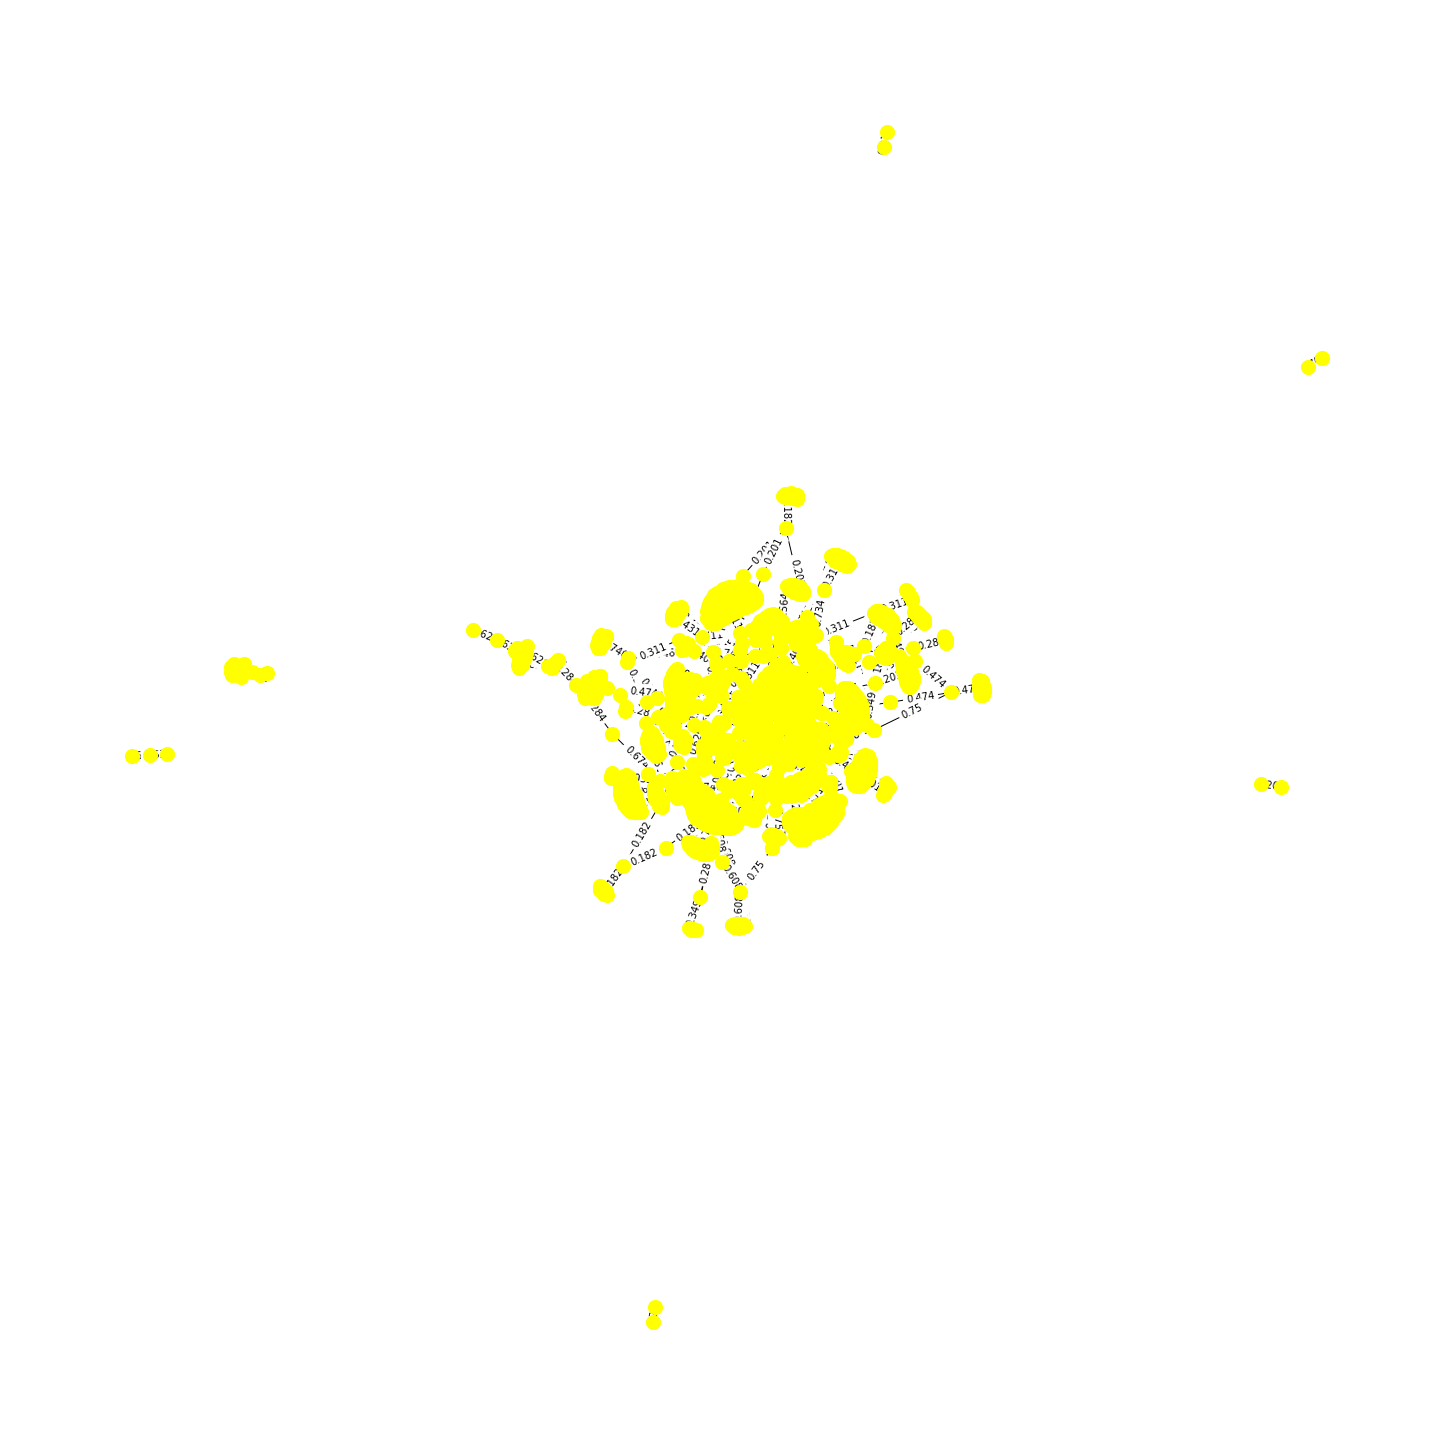

In [54]:
                                        #point 1 *from just 2500 data*
#Read the data from csv and identifying the weights
G=nx.from_pandas_edgelist(df_2500,'tail','head',edge_attr='edge_weight')

pos=nx.spring_layout(G)
plt.figure(figsize=(20,20))
nx.draw(G,pos,node_size=200,node_color = 'yellow')
nx.draw_networkx_edge_labels(G,pos,font_size=10,edge_labels=nx.get_edge_attributes(G,'edge_weight'))
plt.savefig('./Graphs/weightedGraphonly2500.jpg')
plt.show()

In [55]:
                                        # point 2 Two proteins init
G = nx.from_pandas_edgelist(full_df, source='tail', target='head', edge_attr='edge_weight', create_using=nx.DiGraph())

shortest path is ['Q8TBF4', 'Q15717', 'O15085', 'P55157']
number of nodes 4
shortest path weight is 1.096188
weight of each edge is [0.311133, 0.311133, 0.473922]


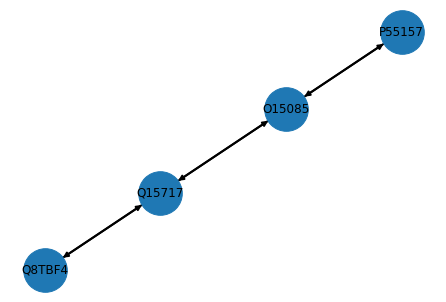

In [69]:
#shortest path
path=nx.shortest_path(G,'Q8TBF4','P55157')
print("shortest path is",path)

# number of nodes
nodes= len(path)
print("number of nodes" ,nodes)

#total cost of the path
path_weight=nx.path_weight(G, path, 'edge_weight')
print("shortest path weight is",path_weight)

#weight of each interaction in the path
edges_weight=[]
for i in range (nodes -1) :
    x= nx.get_edge_attributes(G, "edge_weight")
    s=x[(path[i], path[i+1])]
    edges_weight.append(s)
print("weight of each edge is" ,edges_weight)
#drawing the subnetwork 
result_graph = G.subgraph(path)
nx.draw(result_graph,with_labels=True , node_size=1900, width=2)
plt.savefig('./Graphs/shortestpath.jpg')


dijkstra's path ['Q8TBF4', 'Q6I9Y2', 'Q49A88', 'Q96M89', 'O60308', 'P07237', 'P55157']
number of nodes 7
dijkstra's path weight is 0.6953428
weight of each edge is [0.201461, 0.0580353, 0.0580353, 0.0333391, 0.0333391, 0.311133]


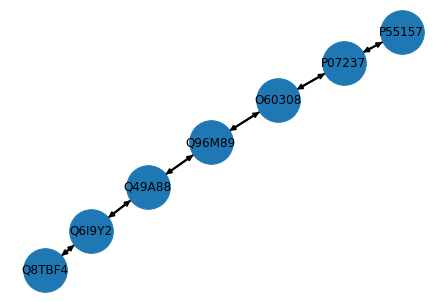

In [57]:
#shortest path using dijkstra's algorithm
dij_path=nx.dijkstra_path(G, 'Q8TBF4', 'P55157', weight='edge_weight')
print("dijkstra's path" ,dij_path)

# number of nodes
dij_nodes= len(dij_path)
print("number of nodes" ,dij_nodes)

#total cost of the path
dij_weight=nx.path_weight(G, dij_path, 'edge_weight')
print("dijkstra's path weight is",dij_weight )

#weight of each interaction in the path
dij_edges_weight=[]
for i in range (dij_nodes -1) :
    x= nx.get_edge_attributes(G, "edge_weight")
    s=x[(dij_path[i], dij_path[i+1])]
    dij_edges_weight.append(s)
print("weight of each edge is" ,dij_edges_weight)

#drawing the subnetwork 
result_graph = G.subgraph(dij_path)
nx.draw(result_graph,with_labels=True , node_size=1900, width=2)
plt.savefig('./Graphs/Dijkstrashortestpath.jpg')



[['Q8TBF4', 'Q15717', 'O15085', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9Y619', 'P55157'], ['Q8TBF4', 'Q15717', 'Q8TAS1', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9Y2J2', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9ULH1', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9NZV5', 'P55157'], ['Q8TBF4', 'Q15717', 'P42566', 'P55157'], ['Q8TBF4', 'Q15717', 'Q14999', 'P55157'], ['Q8TBF4', 'P08865', 'Q14999', 'P55157'], ['Q8TBF4', 'P51148', 'Q14999', 'P55157'], ['Q8TBF4', 'Q8NI27', 'Q14999', 'P55157'], ['Q8TBF4', 'P15880', 'Q14999', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9H1R2', 'P55157'], ['Q8TBF4', 'Q15717', 'Q9NRJ4', 'P55157'], ['Q8TBF4', 'Q15717', 'P62993', 'P55157'], ['Q8TBF4', 'Q8NI27', 'O95433', 'P55157'], ['Q8TBF4', 'P15880', 'O95433', 'P55157'], ['Q8TBF4', 'Q8NI27', 'Q9UJV9', 'P55157'], ['Q8TBF4', 'O43660', 'Q9UJV9', 'P55157'], ['Q8TBF4', 'P15880', 'P35240', 'P55157'], ['Q8TBF4', 'P15880', 'P50570', 'P55157'], ['Q8TBF4', 'P15880', 'O43390', 'P55157'], ['Q8TBF4', 'P15880', 'Q15427', 'P55157']]
number of all shortest paths equa

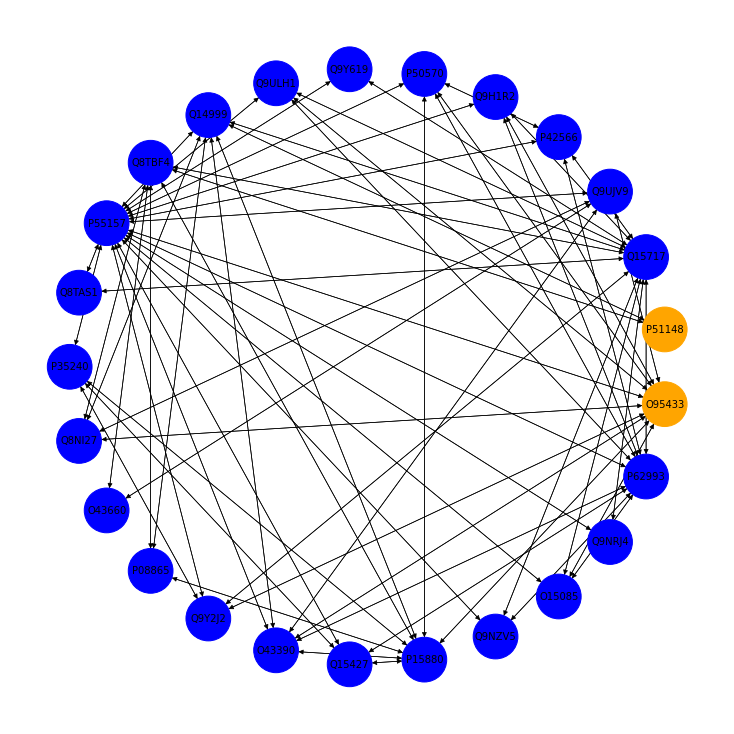

In [58]:
#list of all shortest paths
all_paths=list(nx.all_shortest_paths(G,'Q8TBF4','P55157'))
print(all_paths)

save = pd.DataFrame(all_paths)
save.to_csv('./exportedfiles/allpaths.txt')
print("number of all shortest paths equal =", len(all_paths))
#drawing all shortest paths
my_set = {i for lst in all_paths for i in lst}
s=list(my_set)
plt.figure(3,figsize=(10,10))
result_graph = G.subgraph(s)
b='blue'
o='orange'
node_color=[b,b,b,b,b,b,b,b,b,b,b,b,o,o,b,b,b,b,b,b,b,b,b,b,b]
nx.draw_shell(result_graph,with_labels=True , node_size=2000, width=0.7 , font_size=10 ,node_color=node_color)
plt.savefig('./Graphs/allshortestpaths.jpg')

In [59]:
                                        #Point 3  one protein

#This cell lists all directly connected proteins to a picked protein

#Define dataframe columns
tail = full_df['tail']
head = full_df['head']
edge_weight = full_df['edge_weight']
edge_type = full_df['edge_type']

#Find the most common protein in all PPIs 
most_common_protein=full_df.mode()
if(most_common_protein['tail'][0]==most_common_protein['head'][0]):
    protein = most_common_protein['tail'][0]
else:
    protein = "P05067"

#Extract the rows where said protein is a tail or head into a new dataframe
protein_df = full_df[full_df.eq(protein).any(axis=1)]
protein_df=protein_df.iloc[:,:3]

#Remove the protein name from the dataframe for better readability
protein_list=protein_df.values.tolist()
for row in protein_list:
    if(row[0]==protein):
        row.append("Out")
    if(row[1]==protein):
        row.append("In")
    row.remove(protein)
    
#Save the list of rows as a dataframe
modified_protein_df = pd.DataFrame(protein_list)

#Save the first resulting dataframe into a text file
np.savetxt(r'./exportedfiles/protein_connections.txt', modified_protein_df, fmt='%s')

#Calculate in and out degrees of the picked protein
in_degree = len(protein_df.loc[protein_df['head'] == protein])
out_degree = len(protein_df.loc[protein_df['tail'] == protein])

#Append the in and out degrees of the protein into the protein_connections.txt file
with open("./exportedfiles/protein_connections.txt", "a") as f:
    f.write("In degree: ")
    f.write(str(in_degree) + "\n")
    f.write("Out degree: ")
    f.write(str(out_degree) + "\n")

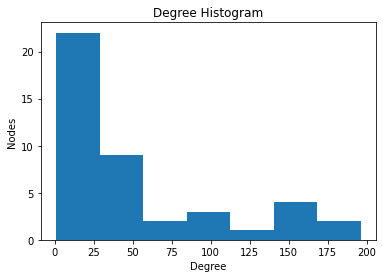

In [60]:
                                        #point 4 a set of proteins
#read & store set of proteins 2500
Graph = nx.Graph()
for i in range(2500):
    tail=full_df['tail'][i] # first column as node
    head=full_df['head'][i]# second column as  node
    weight=full_df['edge_weight'][i] # third column as edge cost/weight
    Graph.add_weighted_edges_from([(head,tail,weight)])
#take degrees from the network
degree_sequence = sorted([d for n, d in Graph.degree()], reverse=True)
#count  degree frequency
degreeCount = Counter(degree_sequence)
plt.hist(degreeCount, bins='auto') #auto bin size is used
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Nodes")
plt.savefig('./Graphs/histogram.jpg')
plt.show()
#save the proteins in csv with its coressponding degrees
to_arr =np.array(Graph.degree())
proteins = []
coressponding_degree = []
for i in range (0,len(to_arr),1):
    proteins.append(to_arr[i,0])
    coressponding_degree.append(to_arr[i,1])
df = pd.DataFrame({"Protein" : proteins, "Degree" :coressponding_degree })
df.to_csv("./exportedfiles/nonsorted.txt", index=False)
# sorting from highest to lowest rank according to connections
sort = pd.read_csv('./exportedfiles/nonsorted.txt')
sort.sort_values(["Degree"],ascending=[False],inplace = True)
degreeCount = Counter(degree_sequence)
sort.to_csv("./exportedfiles/sorted_setOfProteins.txt",index=False)
os.remove('./exportedfiles/nonsorted.txt')



In [61]:
                                        #point 5  UniprotID
#Convert ONE UniProtID to its coressponding Gene Name
request_Protein = IdMappingClient.submit(
    #send request to the server to convert the specified protein
    source="UniProtKB_AC-ID", dest="Gene_Name", ids={"Q6UXB4"})
print('Conversion for the given protein')
print(list((request_Protein.each_result())))

#convert a set of UniprotIDs to its Coressponding Gene Name
Protein_set = {"Q5MIZ7","Q8TBF4","Q9NVL8","O75326","P20933","Q6P1J6","P30939","Q08379","Q2TAC2","P63000"}
request_setProteins = IdMappingClient.submit(
    #send request to the server to convert the specified proteins
    source="UniProtKB_AC-ID", dest="Gene_Name", ids=Protein_set
)
time.sleep(5.0)
print('Conversion for the given list')
print(list(request_setProteins.each_result()))
save = pd.DataFrame(list(request_setProteins.each_result()))
save.to_csv('./exportedfiles/UniProIDtoGeneName.txt')


Conversion for the given protein
[{'from': 'Q6UXB4', 'to': 'CLEC4G'}]
Conversion for the given list
[{'from': 'P63000', 'to': 'RAC1'}, {'from': 'Q08379', 'to': 'GOLGA2'}, {'from': 'O75326', 'to': 'SEMA7A'}, {'from': 'Q2TAC2', 'to': 'CCDC57'}, {'from': 'P30939', 'to': 'HTR1F'}, {'from': 'Q9NVL8', 'to': 'CCDC198'}, {'from': 'P20933', 'to': 'AGA'}, {'from': 'Q6P1J6', 'to': 'PLB1'}, {'from': 'Q8TBF4', 'to': 'ZCRB1'}, {'from': 'Q5MIZ7', 'to': 'PPP4R3B'}]


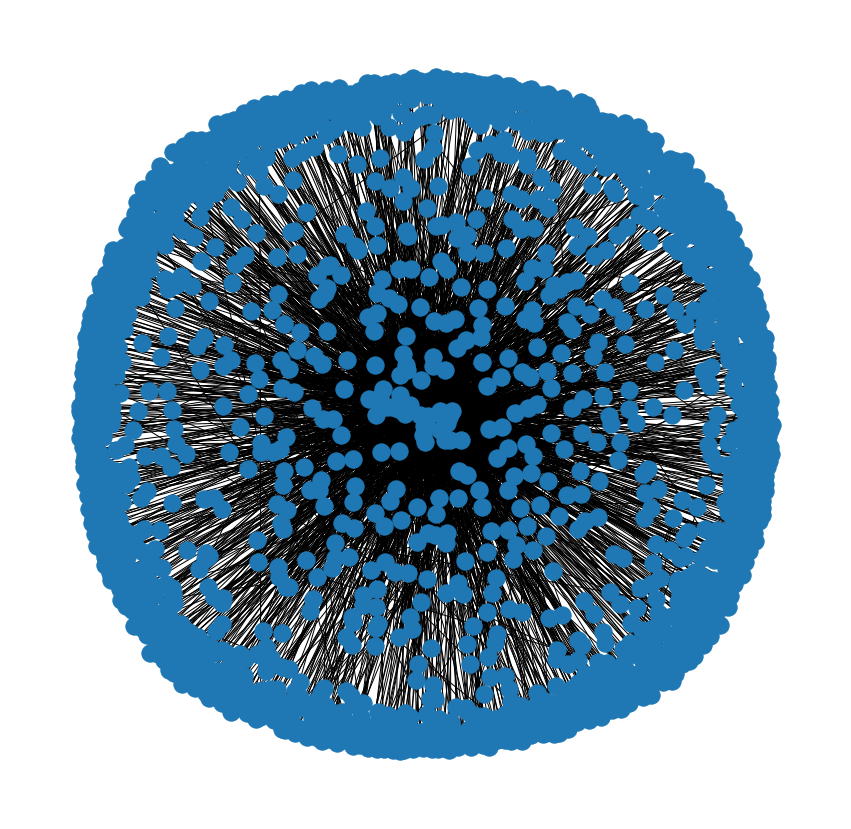

In [62]:
                                        # point 6 unweighted Graph
                                        # plot an unweighted graph *only 2500*
#unweighted graph
unweighted_Graph = nx.Graph()
for i in range(2500):
    tail=full_df['tail'][i] # first column as node
    head=full_df['head'][i]# second column as  node
    unweighted_Graph.add_edges_from([(tail,head)])
#position nodes 
pos = nx.spring_layout(unweighted_Graph, k=0.35)
#create figure
plt.figure(figsize=(15,15))
nx.draw_networkx(unweighted_Graph, pos=pos, with_labels=False)
plt.axis('off')
plt.savefig('./Graphs/unweightedGraph.jpg')
plt.show()

In [63]:
                                            #Point 6 adjacency matrix
                                            #Dangerrrrrr
#Creating a agjacency matrix
unweighted_Graph_toadj = nx.Graph()
for i in range(len(full_df)):
    tail=full_df['tail'][i] # first column as node
    head=full_df['head'][i]# second column as  node
    unweighted_Graph_toadj.add_edges_from([(tail,head)])
adjacency_matrix= nx.adjacency_matrix(unweighted_Graph_toadj)
print(adjacency_matrix)
#save the locations where proteins are interacted *when =1 * 
adj1 =pd.DataFrame(adjacency_matrix)  
adj1.to_csv('./exportedfiles/adjacency1.txt') 


  (0, 1)	1
  (1, 0)	1
  (1, 3)	1
  (1, 4)	1
  (1, 43)	1
  (1, 50)	1
  (1, 67)	1
  (1, 70)	1
  (1, 116)	1
  (1, 123)	1
  (1, 128)	1
  (1, 132)	1
  (1, 159)	1
  (1, 162)	1
  (1, 166)	1
  (1, 190)	1
  (1, 267)	1
  (1, 271)	1
  (1, 272)	1
  (1, 297)	1
  (1, 325)	1
  (1, 328)	1
  (1, 338)	1
  (1, 373)	1
  (1, 408)	1
  :	:
  (17156, 6071)	1
  (17157, 3253)	1
  (17157, 4455)	1
  (17158, 3511)	1
  (17159, 6091)	1
  (17160, 6091)	1
  (17161, 11065)	1
  (17161, 11179)	1
  (17161, 11180)	1
  (17161, 12139)	1
  (17161, 13068)	1
  (17161, 13503)	1
  (17161, 14257)	1
  (17161, 14523)	1
  (17161, 14524)	1
  (17161, 14525)	1
  (17161, 14526)	1
  (17162, 1094)	1
  (17162, 3569)	1
  (17162, 5359)	1
  (17163, 3374)	1
  (17164, 3374)	1
  (17165, 3374)	1
  (17166, 3374)	1
  (17167, 2073)	1


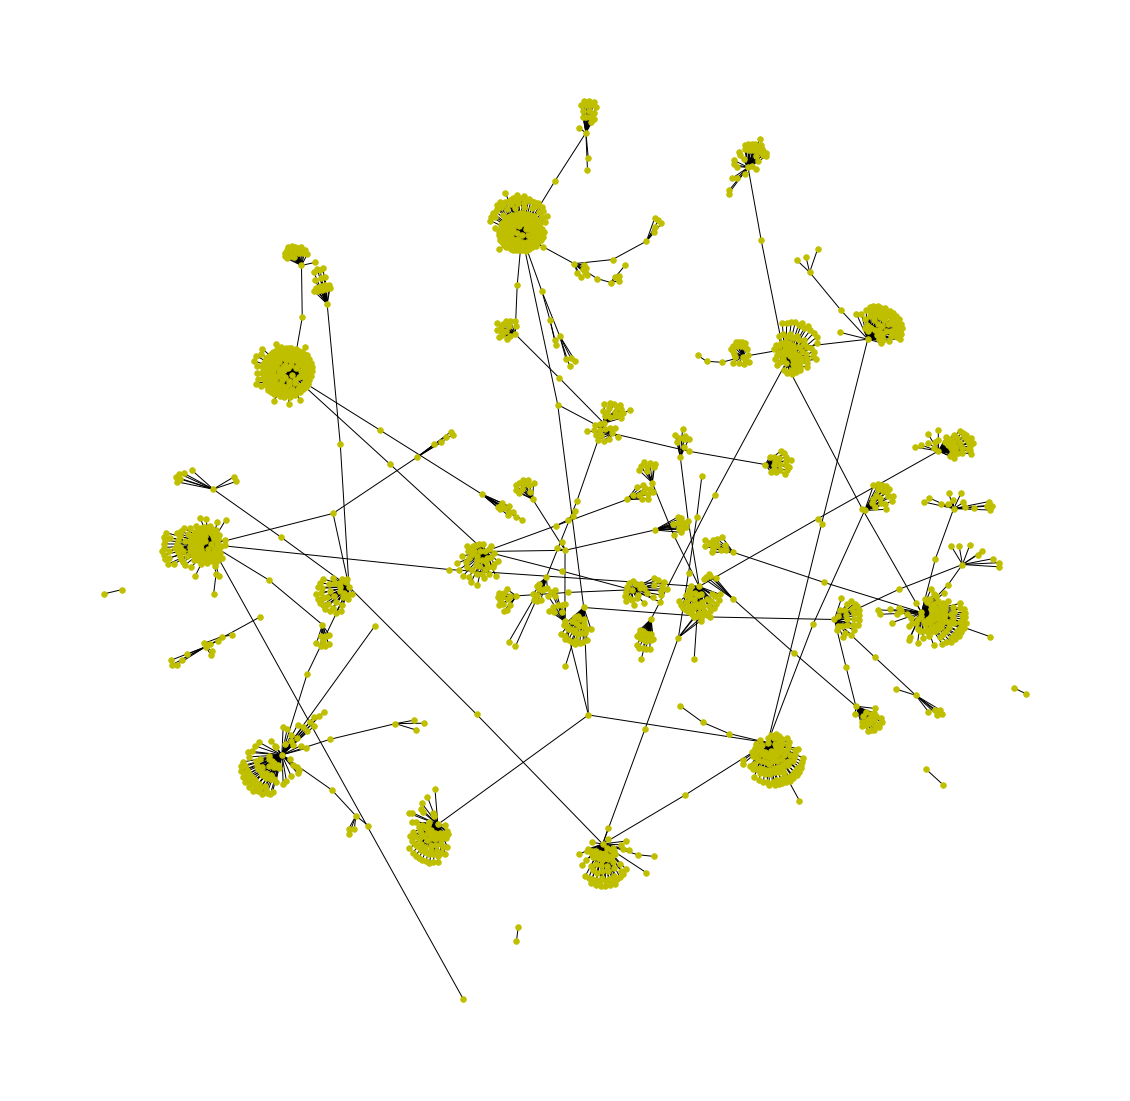

In [6]:
                                    #point 7 minimum spanning tree
g = nx.Graph()
for i in range(len(df_2500)):
    node=df_2500.loc[i,:][0] # first column as node
    next_node=df_2500.loc[i,:][1]# first column as  node
    weight=df_2500.loc[i,:][2] # third column as edge cost/weight
    g.add_weighted_edges_from([(node,next_node,weight)])
T = nx.minimum_spanning_tree(g)
pos = nx.spring_layout(T)
plt.figure(figsize=(20,20))
nx.draw_networkx(T, pos=pos, with_labels=False,
                 node_color='y',
                 node_size= 30 )
plt.axis('off')
plt.savefig('./Graphs/minimumspanningtree.jpg')
plt.show()